ONE:
1) Perform sentimental analysis on the Elon-musk tweets (Exlon-musk.csv)

In [1]:
import pandas as pd
import numpy as np
import nltk
from nltk.corpus import stopwords
import nltk
nltk.download('punkt')
import matplotlib.pyplot as plt

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\apoor\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [2]:
import chardet

# Determine the encoding of the CSV file
with open('Elon_musk.csv', 'rb') as f:
    result = chardet.detect(f.read())
    
# Read the CSV file with the detected encoding
data = pd.read_csv('Elon_musk.csv', encoding=result['encoding'])
result


{'encoding': 'Windows-1252', 'confidence': 0.7298950869484879, 'language': ''}

In [3]:
data

,Unnamed: 0,Text
0,1,@kunalb11 I’m an alien
1,2,@ID_AA_Carmack Ray tracing on Cyberpunk with H...
2,3,@joerogan @Spotify Great interview!
3,4,@gtera27 Doge is underestimated
4,5,@teslacn Congratulations Tesla China for amazi...
...,...,...
1994,1995,"@flcnhvy True, it sounds so surreal, but the n..."
1995,1996,@PPathole Make sure to read ur terms &amp; con...
1996,1997,@TeslaGong @PPathole Samwise Gamgee
1997,1998,@PPathole Altho Dumb and Dumber is <U+0001F525...


Text preprocessing is includes steps like 
1. Removing punctuation
2.converting text to lowercase
3.tokenization (splitting text into individual words or tokens)
4.removing stop words (commonly occurring words like "and," "the," etc.)
5.stemming or lemmatization (reducing words to their base form)
6.handling special characters or encoding issues.

In [4]:
import warnings
warnings.filterwarnings('ignore')

# Remove irrelevant columns
data = data[['Text']]

# Remove duplicate rows
data.drop_duplicates(inplace=True)

# Handle missing values
data.dropna(inplace=True)

# Convert text to lowercase
data['Text'] = data['Text'].str.lower()
data['Text']


0                                  @kunalb11 i’m an alien
1       @id_aa_carmack ray tracing on cyberpunk with h...
2                     @joerogan @spotify great interview!
3                         @gtera27 doge is underestimated
4       @teslacn congratulations tesla china for amazi...
                              ...                        
1994    @flcnhvy true, it sounds so surreal, but the n...
1995    @ppathole make sure to read ur terms &amp; con...
1996                  @teslagong @ppathole samwise gamgee
1997    @ppathole altho dumb and dumber is <u+0001f525...
1998                            progress update august 28
Name: Text, Length: 1997, dtype: object

# Load Positive and Negative  Stop Word Lists

In [5]:
with open('positive-words.txt', 'r') as f:
    positive_words = f.read().splitlines()

with open('negative-words.txt', 'r') as f:
    negative_words = f.read().splitlines()

stop_words_file = 'stop.txt'

with open(stop_words_file, 'r') as f:
    stop_words = set(f.read().splitlines())


# Perform Sentiment Analysis: 

In [6]:
sentiment_scores = []

for tweet in data['Text']:
    positive_count = 0
    negative_count = 0
    
    # Tokenize the tweet
    words = nltk.word_tokenize(tweet)
    
    # Remove stop words
    words = [word for word in words if word not in stop_words]
    
    # Count positive and negative words
    for word in words:
        if word in positive_words:
            positive_count += 1
        elif word in negative_words:
            negative_count += 1
    
    # Determine sentiment based on the count of positive and negative words
    if positive_count > negative_count:
        sentiment_scores.append('positive')
    elif positive_count < negative_count:
        sentiment_scores.append('negative')
    else:
        sentiment_scores.append('neutral')

data['sentiment'] = sentiment_scores
data['sentiment']

0        neutral
1        neutral
2       positive
3        neutral
4       positive
          ...   
1994    positive
1995    positive
1996     neutral
1997    negative
1998    positive
Name: sentiment, Length: 1997, dtype: object

In [7]:
# Count the number of positive, negative, and neutral tweets
sentiment_counts = data['sentiment'].value_counts()

# Calculate the percentage of each sentiment
sentiment_percentages = sentiment_counts / sentiment_counts.sum() * 100
print(sentiment_counts)
print("\n*********************************")
print(sentiment_percentages)


neutral     1213
positive     580
negative     204
Name: sentiment, dtype: int64

*********************************
neutral     60.741112
positive    29.043565
negative    10.215323
Name: sentiment, dtype: float64


As per the above sentiment labelsthe insights we gain into the sentiment expressed in Elon Musk's tweets are as follows:
out of the 1999 total tweets 1213 tweets show neutral sentiments , 580 are Positive sentiments and 204 show negative sentiments.
************************
60% of the total tweets show Neutral sentiments.
29% show Positive sentiments 
10% show negative sentiments

# Word Cloud Visualisation

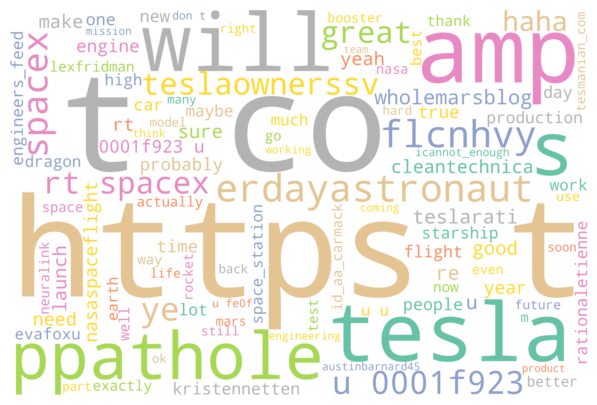

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud


# Extract the text column from the DataFrame
text = ' '.join(data['Text'])

# Create WordCloud object
wordcloud = WordCloud(width = 3000, height = 2000,background_color = 'white',max_words = 100,colormap = 'Set2').generate(text)

# Display the generated word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


In [9]:
# Save image
wordcloud.to_file("wordcloud.png")

# calculating sentiment scores for sentences and plot visualization

In [10]:
# Define a function to calculate sentiment scores for sentences:
def calculate_sentiment_scores(sentences):
    sentiment_scores = []
    
    for sentence in sentences:
        score = calculate_polarity_score(sentence)
        sentiment_scores.append(score)
    return sentiment_scores


In [11]:
def calculate_polarity_score(sentence):
    words = sentence.lower().split()
    positive_count = sum(word in positive_words for word in words)
    negative_count = sum(word in negative_words for word in words)
    polarity_score = (positive_count - negative_count) / len(words)
    return polarity_score


In [12]:
def plot_sentiment_scores(sentiment_scores):
    
    plt.plot(sentiment_scores)
    plt.xlabel('Sentence')
    plt.ylabel('Polarity Score')
    plt.title('Sentiment Analysis')
    plt.show()


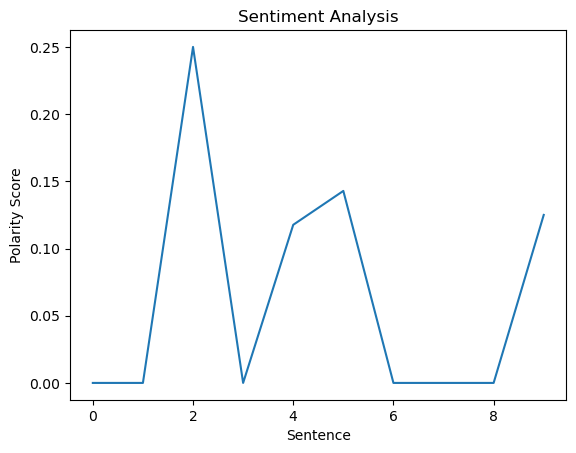

In [13]:
# sentences=sentences = ["not so bad", "awesome Product", "Bad product."]
sentences = data['Text'].iloc[0:10]  #score plotting for 0 to ten text values from the dataset
sentiment_scores = calculate_sentiment_scores(sentences)
plot_sentiment_scores(sentiment_scores)
